In [1]:
import mne
from autoreject import (AutoReject, set_matplotlib_defaults)
import numpy as np

In [2]:
path = "/cubric/scratch/c1557187/act_mis/MEG/0016/new_v1/epochs-TD-000-epo.fif"

In [24]:
epochs = mne.read_epochs(path, preload=True)

In [25]:
epochs = epochs.apply_baseline((-0.1, 0.0))
epochs.baseline = None
epochs = epochs.crop(tmin=1.5)
epochs.shift_time(-1.6)
epochs = epochs.apply_baseline((0.0, 1.0))


In [27]:
ar = AutoReject(
    n_jobs=-1
)
ar.fit(epochs["40"])

Running autoreject on ch_type=mag

[........................................] 100.00% Creating augmented epochs - 
[........................................] 100.00% Computing thresholds ... -  
[........................................] 100.00% Repairing epochs -   
[                                        ]   0.00% n_interp |   
[........................................] 100.00% Repairing epochs -   
[.............                           ]  33.33% n_interp /   
[........................................] 100.00% Repairing epochs -   
[..........................              ]  66.67% n_interp -   
[........................................] 100.00% Repairing epochs -   
[........................................] 100.00% n_interp \   



Estimated consensus=0.50 and n_interpolate=32


AutoReject(consensus=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
      cv=10, n_interpolate=array([ 1,  4, 32]), n_jobs=-1, picks=None,
      random_state=None, thresh_method='bayesian_optimization',
      verbose='progressbar')

In [30]:
%matplotlib
ar.get_reject_log(epochs["40"]).plot()

Using matplotlib backend: Qt5Agg


In [31]:
epochs_clean = ar.transform(epochs["40"])


[........................................] 100.00% Repairing epochs -   No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


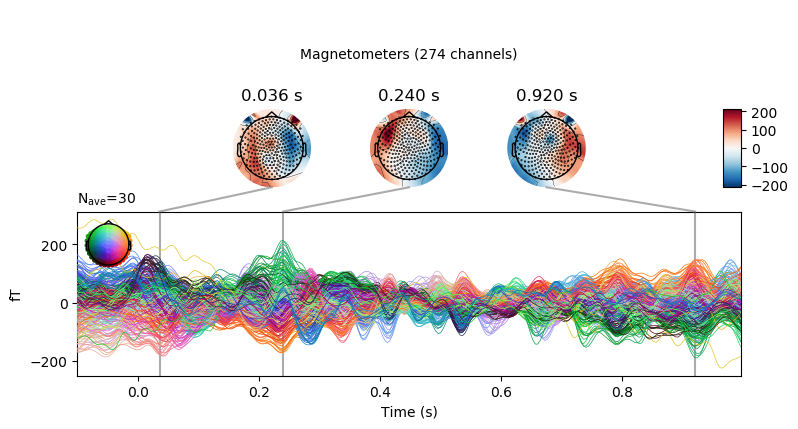

In [32]:
epochs_clean.average().plot_joint()

In [ ]:
epochs["40"]..average().plot_joint()